# Data Mining Versuch Verkehrsschilderkennung mit Neuronalen Netzen

* Autor: Prof. Dr. Johannes Maucher
* Datum: 01.06.2021

# Einführung

In diesem Versuch soll ein Convolutional Neural Network (CNN) für die Erkennung von Verkehrschildern implementiert, trainiert, evaluiert und getestet werden. Als Eingabe erhält das neuronale Netz Bilder von deutschen Verkehrsschildern. Ausgabe ist der Typ des Verkehrsschilds. Für Training und Test sind die Verkehrsschildbilder schon in separate Verzeichnissen abgelegt. Neben den Bildern selbst, enthält das zu diesem Versuch gehörende Datenverzeichnis auch Dateien mit Metadaten, die z.B. Bildeigenschaften, Verkehrsschildbedeutungen und die zugehörigen Klassenlabel beschreiben.

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Convolutional Neural Networks (CNNs)
* Implementierung Tiefer Neuronaler Netze mit Tensorflow und Keras: 
    - Definition der Netzarchitektur
    - Training
    - Evaluation und Test
    
* Einfache Methoden der Bildverarbeitung:
    - Augmentierung
    - Kontrastverstärkung

* Evaluation eines Klassifikators


## Vorbereitung

### Grundlagen Neuronale Netze
Machen Sie sich mit den [Grundlagen herkömmlicher Neuronaler Netze (KI Vorlesung)](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/09_PartLernen4.pdf) und den [Grundlagen Convolutional Neural Networks ((KI Vorlesung))](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/V11DeepLearningKIversion.pdf) vertraut.


### Implementierung Neuronaler Netze mit Tensorflow und Keras
Machen Sie sich mit der Implementierung von Neuronalen Netzen mit Tensorflow und Keras vertraut. Z.B. mit den [Tensorflow Quickstart Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)

# Durchführung

## Vorbereitende Untersuchungen
1. Importieren Sie ein Bild aus dem Verzeichnis `Train` mit der [scikit-image.io](https://scikit-image.org/docs/dev/api/skimage.io.html)-Methode `imread()` und zeigen Sie dieses mit der Methode `imshow()` an. Geben Sie die Größe des Bildes aus (Attribut `.shape`). 
2. Verändern Sie die Größe des Bildes mit der [scikit-image.transform](https://scikit-image.org/docs/dev/api/skimage.transform.html)-Methode `resize()` auf eine Größe von $32x32x3$. Die Verzerrung des Seitenverhältnisses kann dabei ignoriert werden. Diese Methode führt auch eine Normalisierung der Pixelwerte von [0,255] auf [0,1] durch.
3. Führen Sie mit der [scikit-image.exposure](https://scikit-image.org/docs/dev/api/skimage.exposure.html)-Methode `equalize_adapthist()` eine Kontrastverstärkung des Bildes durch. Zeigen Sie das vergrößerte und kontrastangereicherte Bild an. **Anmerkung:** Das kontrastverstärkte Bild sieht zwar unschöner aus, auf der Basis kontrastverstärkter Bilder läßt sich aber im allgemeinen die Objekterkennung verbessern.
2. Importieren Sie die Datei `Train.csv` und machen Sie sich mit deren Inhalt vertraut. Die Datei `Test.csv` ist gleich strukturiert, bezieht sich aber auf die Bilder im Verzeichnis `Test`. Wieviele Zeilen enthalten die Dateien?
3. Importieren Sie die Datei `signnames.csv` und machen Sie sich mit deren Inhalt vertraut. 

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Die Aufgabe war das Bild zunächst mit `imread()` einzulesen, dann mit `imshow()` anzuzeigen und schließlich die zugehörige shape auszugeben. Als Nächstes sollte man die Daten des Bildes auf die Größe von 32x32x3 umformen, was man mit der Methode `resize()` machen kann. Anschließend wurde eine Kontrastverstärkung auf das Bild gemacht, da sich die Objekte dadurch besser erkennen lassen. Nach der Verstärkung war die Aufgabe, `Train.csv` und `Test.csv` zu importieren und sich mit den Daten vertraut zu machen. Jeder Datensatz enthält die Breite, die Höhe, den Pfad des Bildes, Klassen und jeweils 2 x,y Roi-Koordinaten welche ein Viereck spannen. Zum Schluss sollte man die `signnames.csv` importieren, welche die Klassen zu bestimmten Verkehrszeichennamen zuordnet.

In [3]:
import skimage.io as io
import numpy as np
from skimage.transform import resize
from skimage import exposure
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

(30, 29, 3)
Die Größe des Shapes beträgt: (30, 29, 3)


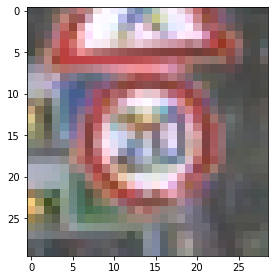

In [4]:
#1
picture = "./data/Train/0/00000_00000_00000.png"
read_picture = io.imread(picture)
print(read_picture.shape)
io.imshow(read_picture)
print("Die Größe des Shapes beträgt: "+ str(np.asarray(read_picture).shape))

In [5]:
#2
resized_picture = resize(read_picture, (32, 32, 3))
print(resized_picture)

[[[0.29490273 0.30623851 0.31408165]
  [0.29151731 0.29966682 0.30750996]
  [0.32677313 0.33136872 0.32401195]
  ...
  [0.26469439 0.2890491  0.28816636]
  [0.25685317 0.27065717 0.26650774]
  [0.26033816 0.2646829  0.26063304]]

 [[0.32203202 0.32650506 0.33434819]
  [0.31307062 0.31435738 0.32220052]
  [0.34210708 0.33983992 0.32722886]
  ...
  [0.28667662 0.30154144 0.30167739]
  [0.29604588 0.30346967 0.29294003]
  [0.30789484 0.30864737 0.30100528]]

 [[0.31010072 0.31052964 0.31821768]
  [0.33011451 0.32735715 0.33235677]
  [0.35600299 0.34715839 0.34840878]
  ...
  [0.28417203 0.29217793 0.28327206]
  [0.29078393 0.29468061 0.27684972]
  [0.30621745 0.30642999 0.29178539]]

 ...

 [[0.49412722 0.5005936  0.51961742]
  [0.46455461 0.48326823 0.50278991]
  [0.42612783 0.45897097 0.47304305]
  ...
  [0.37747396 0.37774203 0.3555396 ]
  [0.38808211 0.39505591 0.36803385]
  [0.38648897 0.40401731 0.38655407]]

 [[0.3548292  0.36929764 0.38483456]
  [0.35781633 0.38303845 0.40235907]


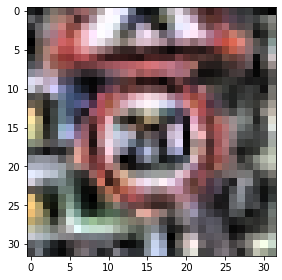

In [6]:
high_contrast_picture = exposure.equalize_adapthist(resized_picture)
io.imshow(high_contrast_picture)

#4
Train.csv hat 39210 Zeilen und Test.csv hat 12631 Zeilen.

In [7]:
#5 
signnames_file = "./data/signnames.csv"
signnames = pd.read_csv(signnames_file)
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


## Funktion für den Import aller Trainings- bzw. Testbilder
Schreiben Sie eine Funktion mit folgenden Eigenschaften:
* Der Funktion wird der Name der Datei übergeben, in welcher die Metadaten stehen, also entweder `Train.csv` oder `Test.csv`.
* Rückgabewerte der Funktion sind 
    * ein 4-dimensionales numpy-array, das alle Bilder des jeweiligen Verzeichnisses (Training oder Test) enthält.
    * ein 1-dimensionales numpy-array, das die Klassenlabel aller Bilder enthält.
* Die Bilder müssen alle auf eine Größe von $32x32x3$ skaliert werden (wie in der Vorbereitungsaufgabe).
* Für alle Bilder ist eine Kontrastverstärkung durchzuführen (wie in der Vorbereitungsaufgabe).

**Tipps für die Implementierung dieser Funktion:**

Iterieren Sie mit einer for-Schleife über alle Zeilen des metadaten-Files. Pro Iteration kann dann 
* der vollständige Verzeichnis- und Filenamen ausgelesen werden,
* das entsprechende Bild mit `imread()` eingelesen werden,
* das Bild auf die vorgegebene Größe angepasst werden,
* der Kontrast des Bildes verstärkt werden.

**Wichtig:** In den von der Funktion zurückgegebenen Arrays, dürfen die Bilder nicht wie in der ursprünglichen Reihenfolge im Dateiverzeichnis enthalten sein. Um sicherzustellen, dass beim Training jedes Minibatch möglichst viele verschiedene Klassen enthält, muss die Reihenfolge geshuffelt werden. Am einfachsten ist es, wenn gleich die Zeilen des Metadatenfiles geshuffelt werden.

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

In dieser Aufgabe sollte man die Bilder wie in der Aufgabe davor importieren, die Form `resizen()`, eine Kontrastverstärkung eines bestimmten Pfades durchführen, welcher als Parameter an die Funktion gegeben wird. Die Funktion gibt die Bilder in einem 4-dimensionalem Array mit den zugehörigen Klassenlabels zurück. Durch ein shuffle aus der random library werden die Daten beim Ausführen jedes Mal in einer unterschiedlichen Reihenfolge zurückgegeben.

In [8]:
def import_pictures(filename):
    file_df = pd.read_csv("./data/" + filename)
    all_data = []
    for i, row in file_df.iterrows():
        data_row = []
        for j in range(len(row)):
            data_row.append(row[j])
        all_data.append(data_row)
    
    all_data_shuffled = list(all_data)
    random.shuffle(all_data_shuffled)
        
    all_image_data = []
    all_class_labels = []
    for row in all_data_shuffled:
        image = row[len(row) - 1]
        image_read = io.imread("./data/" + image)
        image_resized = resize(image_read, (32, 32, 3))
        image_contrasted = exposure.equalize_adapthist(image_resized)
        all_class_labels.append(row[len(row) - 2])
        all_image_data.append(image_contrasted)
    
    print(all_image_data)

    return np.array(all_image_data), np.array(all_class_labels)

## Laden und Vorverarbeiten der Trainings- und Testdaten
1. Laden Sie mit der in der vorigen Teilaufgabe implementierten Funktion alle Trainingsbilder (`trainX`), Trainingslabel (`trainY`), Testbilder (`testX`) und Testlabel (`testY`)
1. Bestimmen Sie die Häufigkeitsverteilung der Klassen in den Trainings- und Testdaten. Visualisieren Sie diese.
3. Alle Labels, sowohl der Trainings- als auch der Testdaten müssen One-Hot-encodiert werden.

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Zu Beginn sollten hier, jeweils für die Trainings- und Testdaten alle Bilder und Label importiert werden. Darauf sollte man die Häufigkeitsverteilung der Trainigslabel anzeigen. Diese wurden mit `matplotlib` geplotet und dargestellt. Im Vergleich sieht man kaum Unterschiede, was zeigt, dass die Trainingsdaten und Testdaten ähnlich sind. Allerdings gibt es auch ein paar Unterschiede, wie man bei dem X-Wert 41 erkennen kann. Zum Schluss sollten alle Label one-hot-encoded werden, wofür man den LabelBinarizer verwenden kann.

In [9]:
#1
trainX, trainY = import_pictures("Train.csv")
testX, testY =  import_pictures("Test.csv")

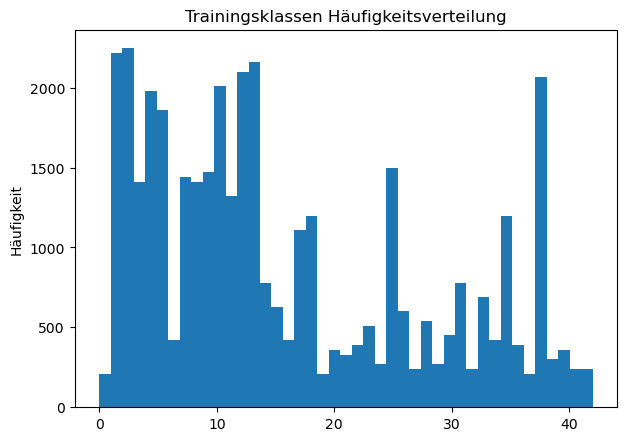

In [10]:
#2
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

myHist = plt.hist(trainY, bins=43)
plt.gca().set(title='Trainingsklassen Häufigkeitsverteilung', ylabel='Häufigkeit');

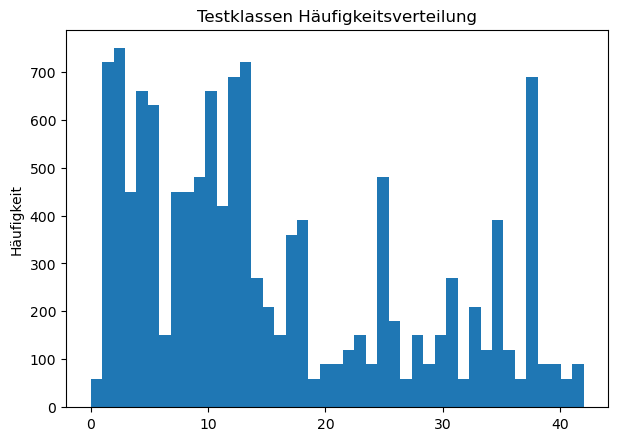

In [11]:
plt.hist(testY, bins=43)
plt.gca().set(title='Testklassen Häufigkeitsverteilung', ylabel='Häufigkeit');

In [12]:
#3 
lb = preprocessing.LabelBinarizer()
one_hot_econded_trainY = lb.fit_transform(trainY)
one_hot_econded_testY = lb.fit_transform(testY)

print(one_hot_econded_trainY)
print(one_hot_econded_testY)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Definition der CNN Architektur
Schreiben Sie eine Funktion `generateCNN(width, height, depth, classes)` die eine Keras CNN-Architektur zurück gibt. Für die Definition der Architektur werden dieser Funktion die Parameter:

* `width`: Breite der Bilder
* `height`: Höhe der Bilder
* `depth`: Anzahl der Kanäle pro Bild
* `classes`: Anzahl der unterschiedlichen Klassen

übergeben. Die in der Funktion zu implementierende Architektur ist im folgenden Bild dargestellt. In der Spalte *Output shape* bezeichnen die zweite und dritte Zahl die Breite und die Höhe der einzelnen Kanäle (*Bilder*), der letzte Parameter bezeichnet die Anzahl der Kanäle (Parameter *filters* in der Konfiguration).
In der Übersichtstabelle ist Filtergröße nicht aufgeführt. Empfohlen sind folgende Größen:
* für alle Pooling Layer: *pool_size=(2,2)*.
* für den ersten Conv2D-Layer: *kernel_size=(5,5)*.
* für alle weiteren Conv2D-Layer: *kernel_size=(3,3)*

**Anmerkung:** Der in der Tabelle mit *flatten_5* bezeichnete Layer ist nicht notwendig und erzeugt in bestimmten Keras-Versionen eine Fehlermeldung. Der Layer sollte nicht nicht in die Architektur mit aufgenommen werden.


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnTrafficSign.png" style="width:700px" align="middle">

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Diese Aufgabe war relativ schnell gelöst und hat daher auch viel Spaß gemacht. Man konnte einfach nach den gewünschten Layern suchen. Zudem hat die (berufliche) Erfahrung eines Gruppenmitglieds zu dem schnellen Ergebnis beigetragen. 
Lediglich zwei kleine Probleme sind aufgetreten, welche sich jedoch mit etwas Hilfe schnell lösen ließen. 
Einerseits passierte es, dass der input und output nicht die selbe ```shape```hatten. Die Lösung hierfür war, ```padding="same"```hinzuzufügen. 
Die zweite Schwierigkeit war die falsche ```Output-Shape``` in der letzten Zeile. Da hatten wir jedoch lediglich vergessen, statt der relu die softmax-Aktivierungsfunktion zu verwenden. 

In [13]:
def generateCNN(width, height, depth, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(8, (5, 5), input_shape=(width, height, depth), padding='same')) 
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), input_shape=(width, height, depth), padding='same'))
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(16, (3, 3), input_shape=(width, height, depth), padding='same'))
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), input_shape=(width, height, depth), padding='same'))
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), input_shape=(width, height, depth), padding='same'))
    model.add(layers.Activation(activations.relu))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, input_shape = (128,)))
    model.add(layers.Activation(activations.relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(classes, input_shape = (128,)))
    model.add(layers.Activation(activations.softmax))
    return model


## Training des CNN
Rufen Sie die im vorigen Abschnitt implementierte Funktion `generateCNN()` auf und weisen Sie die von der Funktion zurückgegebene Architektur der Variablen `model` zu. Durch Aufruf der Funktion `model.summary()` erhalten Sie eine Übersicht des erzeugten Netzes.

Für das Training soll der `Adam`-Algorithmus aus dem Modul `tensorflow.keras.optimizers` benutzt werden. `Adam` implementiert ein *Stochastic Gradient Descent*-Lernverfahren, welches die Lernraten für die Gewichte individuell und dynamisch anpasst.

In den folgenden zwei Codezellen, werden die Trainingsparameter konfiguriert:

In [14]:
NUM_EPOCHS = 15 # Number of training epochs 
INIT_LR = 1e-3 # Initial Learning Rate for ADAM training
BS = 64 # Size of minibatches
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5)) 

model = generateCNN(32, 32, 3, 43)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 16)        0

Für das Training sollen nicht nur die vorhandenen Trainingsbilder eingesetzt werden, sondern zusätzlich Bilder die Augmentierungen der Trainingsbilder sind. Augmentierte Bilder können mit dem `ImageDataGenerator` des Moduls `tensorflow.keras.preprocessing.image` erzeugt werden. Der Code für die Erzeugung des in diesem Projekt eingesetzten Objekts ist unten gegeben. 

**Aufgabe:** Erklären Sie was in dieser Codezelle definiert wird.

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

1. Der Parameter `rotation_range` meint das Maß - in Grad (hier: 10 Grad) - in welchem die Bilder rotieren können, denn nicht alle Bilder können gleich ausgerichtet fotografiert werden - ein wenig Abweichung muss also mit einberechnet werden. 
2. `zoom_range` meint etwas Ähnliches wie `rotation_range`, nur geht es hier um eine Abweichung bzgl. des Zooms - sprich, ein paar Bilder wurden vielleicht etwas näher aufgenommen als andere.
3. Ebenfalls ähnlich ist `width_shift_range`. Hier bezieht es sich auf die Abweichung des Verkehrszeichens auf der X-Achse.

In [16]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Das Training wird mit folgender Codezelle ausgeführt.

**Aufgabe:** Erklären Sie die Argumente der Funktion `fit_generator()`. 


## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

1. ```aug.flow()``` transformiert die Eingabebilder so, dass unter dem Strich mehr Eingabedaten zur Verfügung stehen.
2. ```validation_data``` definiert die Testdatensätze, welche für die Modellevaluation verwendet werden.
3. ```steps_per_epoch``` spezifiziert wie viele "Schritte" eine Epoche durchläuft. Sprich wie oft eine Epoche 'X' Batches bestehend aus einer Stichprobe von 'Y' Elementen ausführt.
4. ```epochs``` definiert dann die Anzahl an Epochen insgesamt.
5. ```class_weight``` bietet das Gewicht zu jedem Klassenlabel. Die Gewichte können auch dazu verwendet werden, bestimmten unterpräsentierten Klassen beispielsweise 'mehr Aufmerksamkeit' während der Trainings zu schenken. In unserem Fall repräsentiert das jeweilige Gewicht den tatsächlichen Anteil an den zur Verfügung stehenden Daten.
6. ```verbose``` gibt an, in welcher Art der Fortschritt der Trainings angezeigt werden soll. Im vorliegenden Fall in der Art des ```progress bar```, also einem Balken.

Für die Ausführung der folgenden Zelle muss das Dictionary `classWeight` (siehe Erklärung oben) angelegt sein. Dieses enthält für jede Klasse den Klassenindex als key und den relativen Anteil dieser Klasse in den Trainingsbildern als Value. Wenn z.B. 30% aller Trainingsdaten zur Klasse 0 gehören, dann wäre der Value zum Key 0 der Wert 0.3.

In [17]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

classWeight = dict()

for label in trainY:
    weight_keys = [key for key in classWeight.keys()]
    if not(label in weight_keys):
        classWeight[label] = 1
    else: 
        classWeight[label] = classWeight[label] + 1
    
for item in classWeight:
    classWeight[item] = round(classWeight[item] / len(trainY), 2)

print(classWeight)
    

{38: 0.05, 2: 0.06, 11: 0.03, 5: 0.05, 23: 0.01, 9: 0.04, 10: 0.05, 25: 0.04, 1: 0.06, 12: 0.05, 30: 0.01, 35: 0.03, 13: 0.06, 41: 0.01, 6: 0.01, 18: 0.03, 31: 0.02, 40: 0.01, 3: 0.04, 4: 0.05, 8: 0.04, 21: 0.01, 15: 0.02, 7: 0.04, 17: 0.03, 37: 0.01, 14: 0.02, 24: 0.01, 26: 0.02, 28: 0.01, 16: 0.01, 33: 0.02, 36: 0.01, 22: 0.01, 19: 0.01, 29: 0.01, 0: 0.01, 39: 0.01, 20: 0.01, 34: 0.01, 42: 0.01, 32: 0.01, 27: 0.01}


In [18]:
# compile the model and train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, one_hot_econded_trainY, batch_size=BS),
    validation_data=(testX, one_hot_econded_testY),
    steps_per_epoch=trainX.shape[0] // BS,
    epochs=NUM_EPOCHS,
    class_weight=classWeight,
    verbose=1)

[INFO] training network...


<ipython-input-18-51669aec0121>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/15
612/612 [==============================] - 38s 61ms/step - loss: 0.0581 - accuracy: 0.4640 - val_loss: 1.1784 - val_accuracy: 0.6384
Epoch 2/15
612/612 [==============================] - 32s 52ms/step - loss: 0.0210 - accuracy: 0.7317 - val_loss: 0.6914 - val_accuracy: 0.7882
Epoch 3/15
612/612 [==============================] - 32s 52ms/step - loss: 0.0131 - accuracy: 0.8176 - val_loss: 0.4712 - val_accuracy: 0.8492
Epoch 4/15
612/612 [==============================] - 34s 55ms/step - loss: 0.0096 - accuracy: 0.8620 - val_loss: 0.3716 - val_accuracy: 0.8869
Epoch 5/15
612/612 [==============================] - 38s 61ms/step - loss: 0.0077 - accuracy: 0.8906 - val_loss: 0.3961 - val_accuracy: 0.8793
Epoch 6/15
612/612 [==============================] - 32s 52ms/step - loss: 0.0062 - accuracy: 0.9096 - val_loss: 0.3350 - val_accuracy: 0.8973
Epoch 7/15
612/612 [==============================] - 32s 52ms/step - loss: 0.0055 - accuracy: 0.9219 - val_loss: 0.3078 - val_accuracy:

Visualisieren Sie die Entwicklung der *Accuracy* über dem Fortschritt der Trainingsepochen. Plotten Sie dabei die entsprechenden Kurven der Accuracy auf den Trainings- und auf den Testdaten in einen Graphen.

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

Im folgenden Graph erkennt man gut, dass die Testdaten die Trainingsdaten gut annähern, wobei ein gewisser Grad an Verbesserung durchaus möglich ist (siehe peaks an Abweichungen). Dennoch sollte man darauf achten, overfitting zu vermeiden. 

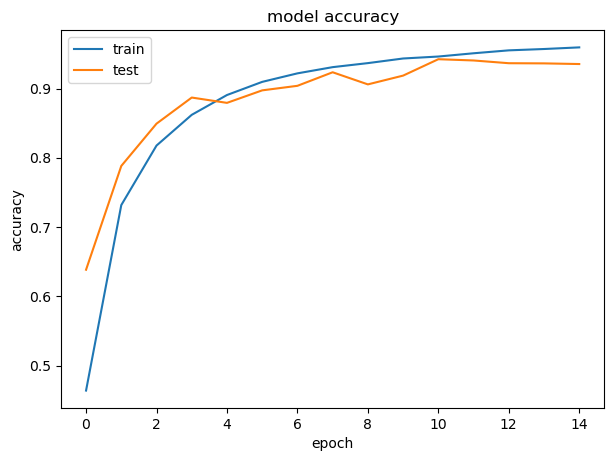

In [27]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluation des gelernten Modells

Wenden Sie das gelernte CNN an, um für alle Bilder des Testdatensatzes die Art des Verkehrsschildes zu bestimmen. Evaluieren Sie die Qualität des CNN indem Sie einen `classification_report()` aus dem Modul `sklearn.metrics` erzeugen. 

1. Welche Metriken werden im Report angezeigt? Beschreiben Sie diese kurz?
2. Diskutieren Sie die Klassifikationsgenauigkeit des CNN anhand des Reports.

Zeigen Sie 5 Bilder an, die nicht korrekt klassifiziert wurden. Läßt sich die Fehlklassifikation erklären?

## <span style="color:#900C3F">Dokumentation unserer Ergebnisse</span> 

1. precision / recall / f1-score / support

`Precision` - die Precision beschreibt wie viele der als Klasse X vorhergesagten auch tatsächlich Klasse X sind <br>
`Recall` - der Recall zeigt wie viele derer, die wirklich zu Klasse X gehören, auch als Klasse X erkannt wurden <br>
`F1-Score` - der F1-Score berechnet das harmonische Mittel aus Precision und Recall. <br>
`Support` - der Support gibt an wie häufig die Klasse X in y_true vorkommt <br>
`Accuracy` - totale Anzahl der korrekten Vorhersagen geteilt durch die totale Anzahl der Vorhersagen
`Macro Average` - Durchschnitt des ungewichteten Mittels pro Klasse 
`weighted Average` - Durchschnitt des gewichteten Mittels pro Klasse 


Der Klassifikationsreport anhand der Testdaten zeigt ein sehr gutes Ergebnis. Die `Precision` fällt nie unter 0.81 und hat einen macro-Durschschnittswert von 0.94. Das zeigt, dass die `y_pred`, also die Vorhersage in ~0.94 der Fälle der tatsächlichen Klasse entspricht. Ebenso ist der `Recall` sehr hoch. Dieser fällt nur einmal auf 0.7 und hat einen macro-Durschschnittswert von 0.92. Es werden also ~0.92 aller Elemente einer Klasse auch tatsächlich dieser Klasse zugeordnet. Somit ergibt sich auch eine hohe `Accuracy` von 0.95. 

Auffällig ist jedoch, dass sich `Macro-average` und `Mean-average` leicht unterscheiden. Bei dem `Macro-average` wird danach gewichtet wie hoch der Anteil der Elemente einer Klasse an allen Elementen ist. Bei einem sehr unbalanciertem Datensatz z.B. einem Datensatz in dem protokolliert wird, wie viele von 100 Patienten auf die Krankheit Y positiv getestet wurden, kann es zu großen Differenzen der Klassen kommen und zu Gewichten von a=0.99 (negativ getestet) und b=0.01 (positiv getestet). In diesem Fall wäre a eine Mehrheitsklasse und b die Minderheitsklasse. Die Gewichte sind weit auseinander und unbalanciert. Wenn also wie bei der Berechnung des Macro-average die Gewichtung miteinbezogen wird, dann muss man darauf achten, dass die Klassen nicht zu unbalanciert sind. 

Bei der Berechnung des `Mean-average` werden diese Gewichte nicht beachtet. Somit würden a und b in diesem Fall gleich behandelt werden. 
In dem Fall von den Daten zu der Verkehrszeichenerkennung sind die Klassen ebenfalls nicht gleich verteilt. Das erkennt man an den unterschiedlichen Werten in der `Support`-Spalte. Allerdings sind die Differenzen nicht so signifikant wie bei dem Beispiel mit den Patienten. Es ergibt sich dennoch ein unterschiedlicher Wert für den `Weighted-Average`. Bei einem balancierten Datensatz würden die Werte von `Macro-Average` und `Mean-Average` übereinstimmen. Bei einem Klassenungleichgewicht wird die `Accuracy` ein ungenaues Ergebnis liefern, weil die Minderheitsklasse eventuell nicht erkannt wird. Darauf sollte man also achten bei dem Lesen eines solchen Klassifikationsreports. 

Die fehlerhafte Klassifikation der 5 ausgewählten Bilder lässt sich unter Anderem mithilfe der Kontrastverstärkung erklären. Vor allem bei Bild Nummer 1 ist es selbst mit den Augen nur schwer zu erkennen, welches Schild gemeint ist. 
Außerdem spielen auch schwierige Lichtverhältnisse eine nicht zu vernachlässigende Rolle. Beispielsweise erkennt man im letzten Bild einen regelrechten gelben Fleck - wohl aufgrund erhöhter Sonneneinstrahlung.
Ein Beispiel von besonders wenig Lichteinstrahlung erkennt man im dritten Bild. 

Vor allem die falschen Klassifikationen aufgrund unterschiedlichster Lichtverhältnisse sollten im Bestfall 'vernichtet' werden, da es im Straßenverkehr immer wieder zu plötzlichen Verdunkelungen durch Wolken, Regen oder Tunnel kommen kann.

In [20]:
y_pred = model.predict(testX)
y_true = testY
y_preds = y_pred.argmax(axis = 1)

report = classification_report(y_true, y_preds, labels=list(range(43)))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.98      0.98      0.98       720
           2       0.98      0.95      0.97       750
           3       0.97      0.95      0.96       450
           4       0.98      0.97      0.97       660
           5       0.87      0.97      0.92       630
           6       0.95      0.95      0.95       150
           7       0.97      0.86      0.91       450
           8       0.86      0.96      0.91       450
           9       0.90      0.99      0.94       480
          10       1.00      0.95      0.97       660
          11       0.88      0.87      0.88       420
          12       1.00      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       0.98      1.00      0.99       270
          15       0.98      0.94      0.96       210
          16       0.92      0.97      0.94       150
          17       1.00    

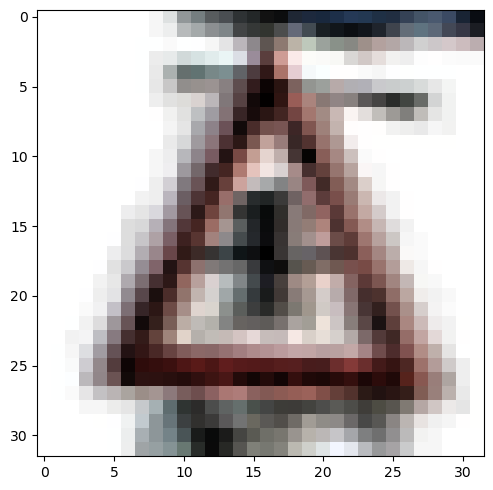

In [21]:
inputs = []

for input, prediction, label in zip(testX, y_pred, y_true):
    if(prediction is not label):
        #print(input, 'has been classified as ', prediction, 'and should be ', label)
        inputs.append(input)
    
io.imshow(inputs[0])
#print(inputs[:5])

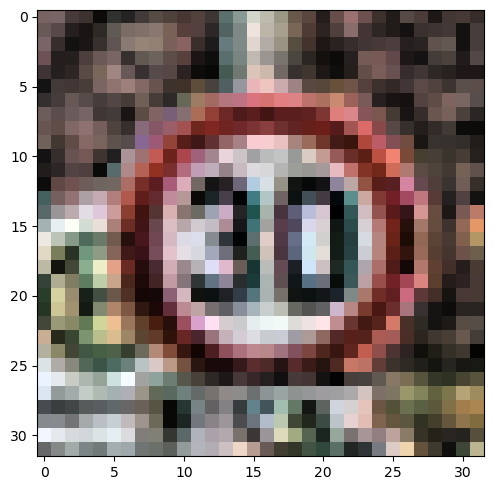

In [22]:
io.imshow(inputs[1])

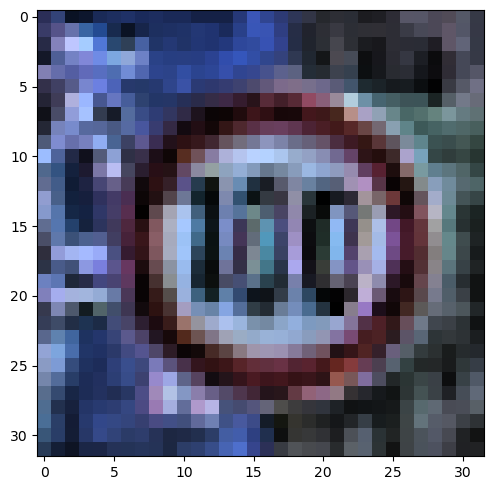

In [23]:
io.imshow(inputs[2])

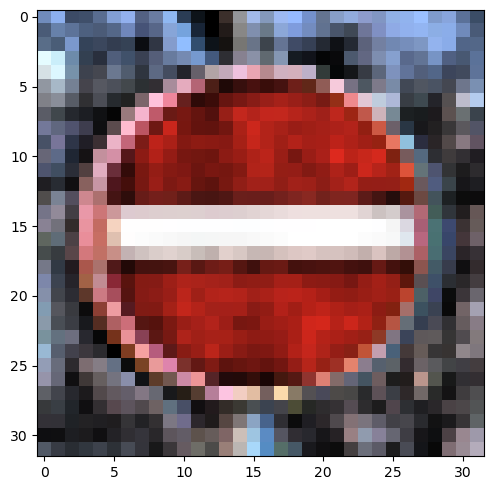

In [24]:
io.imshow(inputs[3])

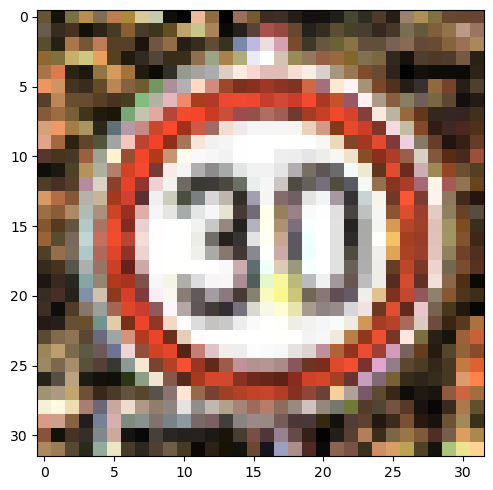

In [25]:
io.imshow(inputs[4])

## <span style="color:#900C3F">Fazit</span> 

Auch der letzte Versuch aus der Reihe war wieder sehr interessant. Wir haben mehr darüber gelernt wie CNN funktionieren. Vor allem konnte man das sehen, beim Betrachten der Werte u.a. der Accuracy, die von Epoche zu Epoche stetig stiegen. Genau wie bei der Gesichtserkennung funktioniert die Klassifizierung erstaunlich gut, wenn man auch die Punkte der unbalance
, wie im vorherigen Dokuabschnitt beschrieben, beachten muss. 


Abschließend können wir sagen, dass das ganze Modul sich wirklich gelohnt hat. Auch wenn es stimmt, was am Anfang gesagt wurde, dass es sehr zeitintensiv sein wird, hat man umso mehr gelernt. Geholfen haben dabei natürlich auch die sehr spannenden Themen z.B. der Versuch der Empfehlungssysteme/ Musikempfehlungen, die einem jeden Tag begegnen und bei denen man sich jetzt besser vorstellen kann wie sie funktionieren. 

Wir danken Ihnen an dieser Stelle für die Möglichkeit, diese Versuche durchzuführen. :)